# Lecture 09 - CircuitPython Introduction
___

In [ ]:
name = "Your name here"
print("Name:", name.upper())

## Purpose:

Assemble circuits with and install/modify/run pre-written CircuitPython scripts and your own scripts on an Adafruit Circuit Playground Bluefruit (CPB) (or an Adafruit Metro M0 Express) micropocessor board. The circuits and code will interact with a number of different physical devices and sensors; both built into the CPB and external.

The CPB includes the following built-in devices and sensors
- 1 Red LED
- 10 NeoPixels (multi-color LEDs)
- 2 Push Buttons
- Slide Switch
- Temperature Sensor
- Light Sensor
- 3-Axis Accelerometer (Motion Sensor)
- Digital Microphone Audio Sensor
- Speaker
- 14 Connection Pads
    - 6 Power Pads
        - 3 Ground
        - 2 3.3V
        - 1 Vout
    - 7 Capacitive Touch (A1-A6 and TX)
    - 6 Analog Inputs (A1-A6)
    - 8 Digital I/O (AUDIO, A1-A6, TX)
    - 8 Pulse Width Modulation (PWM) Output (AUDIO, A1-A6, TX)

In addition to the above built-in devices and sensors, the Circuit Playground Bluefruit has Bluetooth LE and can be paired with a smart phone via an app.

## Instructions

1. Replace "Your name here" in the cell below the assignment title with your first and last names and then execute the cell using "Shift-Enter"
2. Execute the time stamp cell
1. Download the *Mu Editor* and connect to a provided CPB using this editor
1. Follow along in class as we learn to write *CirciutPython* scripts using *Mu* and copy them to the CPB
    - Copy the provided code for each circuit into **`code.py`** on the CPB (replacing any existing code) and save **`code.py`**. Saving the code will automatically cause the board to restart and run the new code.
    - Study the code to see how it works (you will have to write your own code from scratch very soon) and make modifications as directed
    - Test the script to verify that the script and circuit work as they should
4. Execute the date stamp cell at the end of the document and submitting your saved `.ipynb` file to *Canvas* for credit

In [ ]:
from datetime import datetime
from pytz import timezone
print(datetime.now(timezone('US/Eastern')))

## Background

*Arduinos* are micro-controllers that can be programmed to control physical devices. In the words of one of the founders, Massimo Banzi, in his book *Getting Started with Arduino*, “*Arduino* is an open source physical computing platform based on a simple input/output (I/O) board and a development environment that implements the Processing language (www.processing.org). *Arduino* can be used to develop standalone interactive objects or can be connect to software on your computer.”

Adafruit Industries is currently a manufacturer of US made/sold *Arduino* boards. They modified the design of an *Arduino* board to accept a different processor that can run a version of *Python* called **CircuitPython** (https://circuitpython.readthedocs.io/en/latest/?) that does essentially the same tasks as the *Arduino* software. We will be using two of the many available *CircuitPython* boards to learn how to use *Python* to program the real world. Our boards are the [Circuit Playground Bluefruit](https://learn.adafruit.com/adafruit-circuit-playground-bluefruit/overview) and [Metro M0 Express](https://learn.adafruit.com/adafruit-metro-m0-express-designed-for-circuitpython?view=all). Follow the links to see how to get/update *CircuitPython* on the boards to get up and running.

Learning to program a microprocessor board may open your mind to possible Senior Project ideas for machines/devices/systems that need to be controlled and connected to a variety of physical devices/sensors. It may also spark an interest in real world physical computing projects in your everyday life; also known as the Internet of Things (IOT).

[Getting Started with CircuitPython](https://learn.adafruit.com/welcome-to-circuitpython)

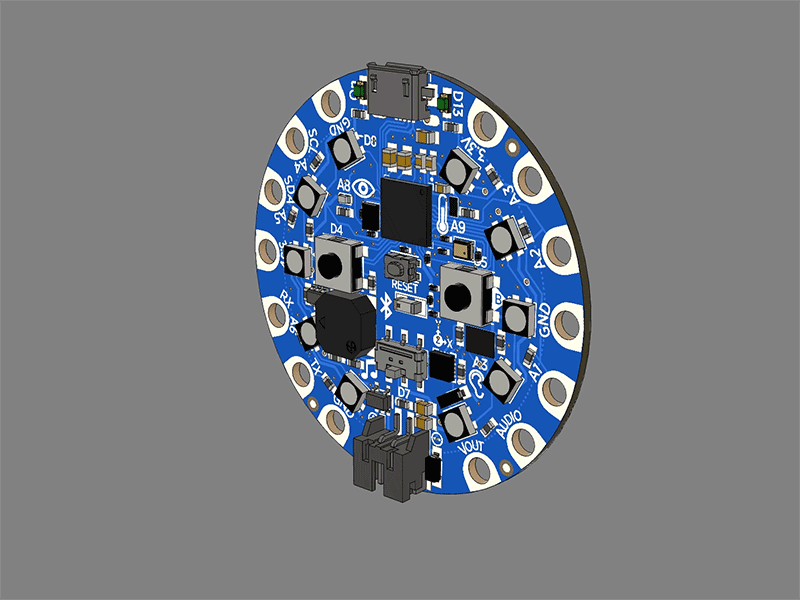

GIF courtesy of Adafruit Industries and the Ruiz Brothers

## Common CircuitPython Modules

Nearly everything that you have already learned about *Python* can be used when programming in *CircuitPython*. What’s new is the addition of special modules for interacting with external devices. We need to import these modules in order to turn on/off lights, motors, etc. or read the input from buttons and sensors. At the top of scripts that run in *CircuitPython*, you may need to add one or more of the following lines:

```
import board        # access to board pin names
import time         # time functions
import digitalio    # on/off inputs/outputs
import analogio     # variable inputs/outputs
import pulseio      # pulsed inputs/outputs
import simpleio     # miscellaneous input/output support
import neopixel     # access to multicolored LEDs
import random       # random numbers
```

For the Circuit Playground Bluefruit there is an additional, very powerful module that we will use. It will allow us to easily interact with the many built-in devices and sensors.

```
from adafruit_circuitplayground import cp    # quick and easy access to CPB built-in devices
```


### `board` Module

This module provides access to the pin and interface names available on the specific board you are using. For instance, `board.D0` refers to a digital input/output (I/O) pin and `board.A0` refers to an analog input pin. We use these when we assign descriptive variable names to board-level names. Use the following command from the REPL with the device connected to your computer to see the supported `board` pins. The below list is for the CPB.

```
>>> import board
>>> dir(board)
['__class__', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A8', 'A9', 'ACCELEROMETER_INTERRUPT',
'ACCELEROMETER_SCL', 'ACCELEROMETER_SDA', 'AUDIO', 'BUTTON_A', 'BUTTON_B', 'D0', 'D1',
'D10', 'D12', 'D13', 'D2', 'D3', 'D35', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'I2C', 'L',
'LIGHT', 'MICROPHONE_CLOCK', 'MICROPHONE_DATA', 'MISO', 'MOSI', 'NEOPIXEL', 'POWER_SWITCH',
'RX', 'SCK', 'SCL', 'SDA', 'SLIDE_SWITCH', 'SPEAKER', 'SPEAKER_ENABLE', 'SPI',
'TEMPERATURE', 'TX', 'UART']
```

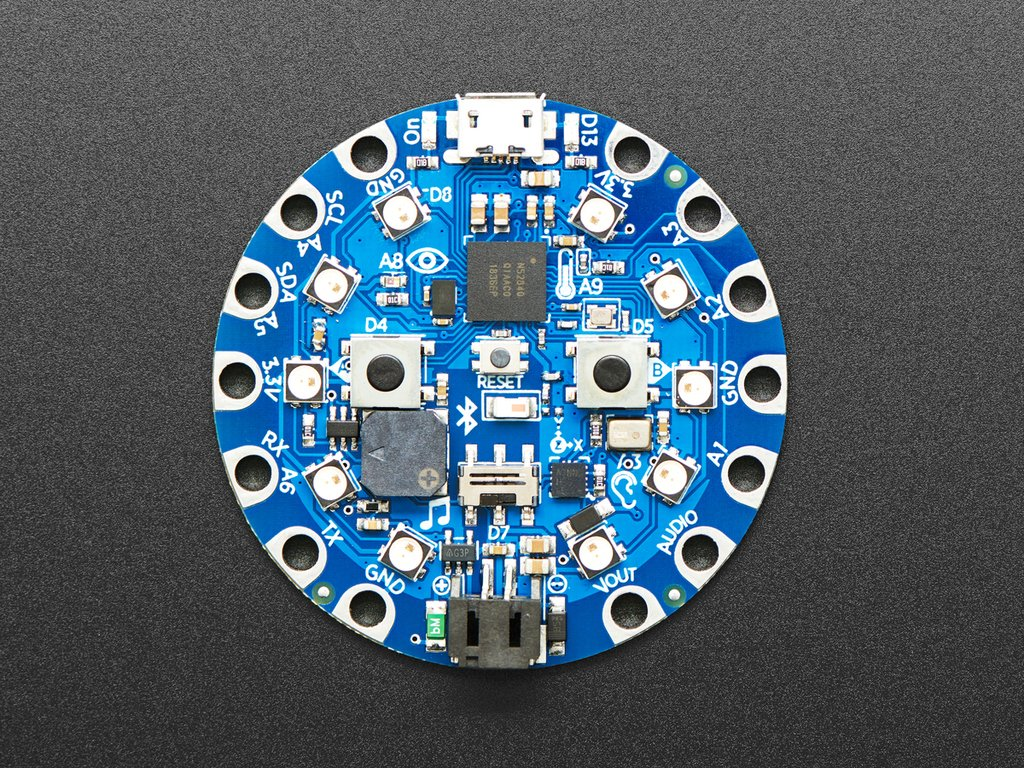

Most of the pads around the perimeter of the CPB are associated with more than one items from the `board` list.

- **AUDIO (D12 or SPEAKER)**: can be used as a digital I/O and PWM out (more on PWM later)
- **A1 (D6)**: can be used as an analog input, digital I/O, PWM out, and capacitive touch
- **A2 (D9)**: can be used as an analog input, digital I/O, PWM out, and capacitive touch
- **A3 (D10)**: can be used as an analog input, digital I/O, PWM out, and capacitive touch
- **A4 (D3)**: can be used as an analog input, digital I/O, PWM out, and capacitive touch
- **A5 (D2)**: can be used as an analog input, digital I/O, PWM out, and capacitive touch
- **A6 (RX or D0)**: can be used as an analog input, digital I/O, PWM out, and capacitive touch
- **TX (D1)**: can be used as an analog input, digital I/O, PWM out, and capacitive touch

The built-in devices are also generally associated with more than one `board` item.

- **BUTTON_A (D4)**: momentary push button
- **BUTTON_B (D5)**: momentary push button
- **SLIDE_SWITCH (D7)**: "on/off" slider
- **NEOPIXEL (D8)**: 10 multi-color LEDs
- **LIGHT (A8)**: light sensor
- **TEMPERATURE (A9)**: temperature sensor

### `time` Module

The `time` module contains several time-related functions, two of which we will use regularly; `time.sleep()` and `time.monotonic()`. The `time.sleep()` function requires an argument in seconds and causes the processor to pause for that amount of time before continuing on further in the script. Outputs that were turned on before a `sleep` command will remain on while the processor is "sleeping."

The `time.monotonic()` function does not accept any arguments. It simply returns an float associated with the time since the last reset. The CPB and Metro M0 do not keep real clock times. This function allows you to include timing between events in a script by comparing the value of `time.monotonic()` at one point in a script versus another. The following example shows how it might be used. It turns on an LED and then runs a loop in which the value of `time.monotonic()` is checked each pass to see if 3 seconds has elapsed. If it has, the LED is changed to the opposite state and the static comparison time `time_old` is given a new value. This code will create a blinking LED circuit where the LED blinks every 3 seconds without using the `time.sleep()` function.

```
time_old = time.monotonic()
LED1.value = True
while True:
    if time.monotonic() >= time_old + 3:     # at least 3 seconds has elapsed
        LED1.value = not LED1.value
        time_old = time.monotonic()
```

### `digitalio` Module

This module is used for interacting with on/off style inputs and outputs, like simple push buttons and LED lights. The function `digitalio.DigitalInOut()` is used to tell a particular pin that it will be used as an on/off I/O; i.e. it initializes the pin. The following sequence of commands sets up `board.D0` as a digital input named `button1`.

```
button1 = digitalio.DigitalInOut(board.D0)
button1.direction = digitalio.Direction.INPUT
```

All digital IO pins default to the `INPUT` state when itialized, so the second line is not necessarily required, but it does not hurt anything to use it. The following sequence of commands initializes `board.D13` as a digital output named `LED1`. On the CPB and other Adafruit boards, D13 is assigned to an on-board red LED. Initializing a pin as an output always requires setting a direction, i.e. `.direction`.

```
LED1 = digitalio.DigitalInOut(board.D13)
LED1.direction = digitalio.Direction.OUTPUT
```

The direction can be set using the `.switch_to_input()` or `.switch_to_output()` methods instead, i.e. `button1.switch_to_input()` or `LED1.switch_to_output()`.

External circuits with buttons/switches or LEDs need to incorporate resistors. When used with LEDs, they keep the LEDs from burning out due to too much power. With buttons/switches, they "anchor" the voltage when the button is not activated to either the high or low voltage. Such resistors are called pull-up or pull-down resistors. For the built-in buttons and slide switch these resistors are included, but they have to be activated via code. The buttons use pull-up resistors and the slide switch uses a pull-down resistor.

```
# button_a will be LOW when not pressed and HIGH when pressed
button_a = digitalio.DigitalInOut(board.BUTTON_A)
button_a.switch_to_input(pull=digitalio.Pull.DOWN)

# slider will be LOW when slid right and HIGH when slid left
slider = digitalio.DigitalInOut(board.SLIDE_SWITCH)
slider.switch_to_input(pull=digitalio.Pull.UP)
```


In order to read the state of `button_a`, whether it is `True` (pressed in this case) or `False` (not pressed), you simply check its state (value) with the `.value` method, i.e. `button_a.value`. This is typically done as part of an `if` statement (as shown below). Depending upon how an input is wired (whether a pull-up or pull-down resistor is used), `True` could mean it is either pressed or not pressed. The state (value) of `LED1` can be set to either on or off simply by assigning its value to either `True` (on) or `False` (off); i.e. `LED1.value = True`. The following code will turn on `LED1` when `button_a` is `True`.

```
if button_a.value:
    LED1.value = True
else:
    LED1.value = False
```

A more *Pythonic* method to do the same thing is shown below.

```
LED1.value = Button1.value
```

Reference: [CircuitPython Basics: Digital Inputs & Outputs](https://learn.adafruit.com/circuitpython-digital-inputs-and-outputs)

**More on Resistors with Buttons**

Whether a switch is `True` or `False` when it is pressed and not-pressed depends upon how it is wired. If one leg of the switch is connected to the digital output pin and an external resistor is also connected between that leg and $3.3V$, the other leg of the switch should be connected to the ground. The external resistor in this case is referred to as a pull-up resistor. When the button is not-pressed the voltage is pulled-up to $3.3V$ and `Button.value` will be `True`. When the button is pressed, `Button.value` will be `False`. This is the wiring method used in external circuit diagrams provided with this lab.

The CPB (and Metro M0) includes internal pull-up resistors at each digital pin. When using an internal resistor, you must not use an external resistor as well. Using the internal pull-up resistor will make a button act the same as above, i.e. not-pressed equals `True` and pressed equals `False`. In this case, one leg of the switch needs to be wired to the digital pin and the other leg to ground. After setting the pin direction to input in the code, add a line similar to `button.pull = digitalio.Pull.UP` to make the input use the internal resistor. Or you can use the method demonstrated for `button_a` previously.

Using the internal resistors with switches (push buttons) requires a little bit more coding but less wiring. Regardless of which methodology you choose to use, be careful to not blend them together.

>**Practice it: Blink the red LED**
>
>Use `digitalio` to blink the red LED (D13) on the CPB.
>
>Replace all code in `code.py` on the CPB with the code in the following cell and make sure it works. *Quick quiz*: What does the `while True:` statement do?
>
>Change the rate at which the LED blinks to 3 seconds. Add a `print()` statement to display the status of the LED as "On" or "Off" to the REPL.


In [ ]:
# Blinking LED
# Use the Serial button in Mu to print the light status as
# "On" or "Off". Change the rate of blinking to 3 seconds.

import board
import digitalio
import time

LED = digitalio.DigitalInOut(board.D13)
LED.switch_to_output()

LED.value = False  # set the LED "Off" to start

while True:
    LED.value = not LED.value
    time.sleep(1.0)

>**Practice it: Turn light on and off with the slider switch**
>
> Fix the `digitalio` definitions to use the appropriate names from `board` for `slider` and `red_LED`. Add a single statement inside the loop to turn `red_LED` on and off with `slider`.

In [ ]:
import board
import digitalio

slider = digitalio.DigitalInOut()   # finish this definition
slider.switch_to_input(pull=digitalio.Pull.UP)

red_LED = digitalio.DigitalInOut()  # finish this definition
red_LED.direction = digitalio.Direction.OUTPUT

while True:
    # add statement here

### `analogio` Module

The `analogio` module commands/functions are typically used to read variable signals from analog devices like temperature and light sensors. The voltage from these types of sensors varies linearly from 0V up to either 3.3V or 5V, depending upon the device. The CPB and Metro M0 Express boards use 3.3V for a high voltage level.

The board converts analog inputs into digital values that can be used within a script. Adafruit boards always divide the low to high voltage signals into 16-bits of data. This means that 0V equates to a digital value of `0` and 3.3V equates to $2^{16}-1$ or `65535`. The actual analog to digital converter (ADC) on the CPB (and Metro M0) is only a 12-bit device, but the processor automatically converts the signal to 16-bits for programming.

All analog pins on `board` start with the letter **A**. The CPB and Metro M0 Express both include six analog pins; `board.A1` through `board.A6` on the CPB and `board.A0` through `board.A5` on the Metro M0. Initializing `board.A1` as an analog input and reading its value can be done with commands like the following:

```
light_sensor = analogio.AnalogIn(board.A1)
light_sensor.value
```

The `.reference_voltage` method can be called on an analog input to check the reference (high) voltage level used by the input. The following code from Adafruit (see the reference below) could be used to convert an input reading to an associated voltage.

```
light_sensor.value / 65535 * light_sensor.reference_voltage
```

The Metro M0 has only one true analog output pin whose digital to analog converter (DAC) supports 10-bit resolution. However, for consistency sake, the M0 uses 16-bits in the programming environment just like the inputs do. The analog output pin on the M0 is `board.A0`. The following code illustrates the initialization of this pin and setting a value.

```
var_LED = analogio.AnalogOut(board.A0)
var_LED.value = 50000
```

Reference: [CircuitPython Basics: Analog Inputs & Outputs](https://learn.adafruit.com/circuitpython-basics-analog-inputs-and-outputs)

The Circuit Playground Bluefruit does not include a true analog input pin. It replaces A0 with AUDIO to provide for audio output to either the internal speaker or an external device such as a powered speaker or headphones.

>**Practice it: Use `analogio` to read the value of the light sensor**
>
> Import and use the `analogio` module to read the value of the light sensor and print it to the REPL. Add an expression so that the value is only read every 2 seconds.

In [ ]:
import time
import analogio

light_sensor = analogio.AnalogIn()   # finish this definition

while True:
    # finish the expression below to assign the sensor value to the variable
    light_value = 
    print("The light level is {}".format(light_value))
    # add code below so the light level is only read and printed every 2 seconds
    

### `pulseio` Module

All of the digital I/O pins on the CPB (and many of the digital I/O pins and all analog pins except **`A0`** on the M0 board) can be configured to act like analog outputs using a technique called **Pulse Width Modulation (PWM)**. The digital pins on the M0 that have this functionality are denoted with a dot next to their identification number on the board.

PWM acts like an analog output by pulsing the output between high and low at a particular frequency, giving the appearance of a variable output value. This works well with devices like LEDs, motors, and servos. The `pulseio` module is used when dealing with PWM outputs. The following code initializes `D6` as a PWM output and then sets the output value using the `.duty_cycle` method. The duty cycle values sent to a PWM output can be anywhere from `0` (off) to `65535` (fully on), just like true analog signals.

```
motor_pin = board.D6
motor = pulseio.PWMOut(motor_pin)
motor.duty_cycle = 42500
```

The following code can be used to set the duty cycle as a percentage. The example is setting the value to 66%.

```
percentage = 66
motor.duty_cycle = int(percentage / 100 * 65535)
```

>**Practice it: Ebb and fade the red LED between on and off using `pulseio.PWMOut`**
>
> Use the following code to ebb the red LED from off to fully on. Add a second loop to fade it from fully on to off.

In [ ]:
import time
import pulseio

red_LED = pulsio.PWMOut()   # complete this definition
red_LED.duty_cycle = 0      # start with the light off

while True:
    # ebb the light from low to high
    for intensity in range(0, 65536, 64):
        # set the duty cycle for the red LED to intensity below
        
        time.sleep(0.005)
    # add a second loop that fades the light from high to low
    
    

### `simpleio` Module

The `simpleio` module provides for a number of specialized helper commands/functions that either the previous modules don't easily support or make a supported procedure easier. It includes the following functions and classes:

- `tone()`
- `bitWrite()`
- `shift_in()`
- `shift_out()`
- `map_range()`
- `DigitalOut()`
- `DigitalIn()`

The `tone(pin, frequency, duration)` function will generate a tone to play via a PWM output. The frequency argument is in hertz and the duration is in seconds. The duration argument is optional; if not used it defaults to 1 second.

The `bitWrite()`, `shift_in()`, and `shift_out()` functions are less commonly used. They all perform bit-level operations.

The `map_range(x, in_min, in_max, out_min, out_max)` function scales `x` from one range to another. For example, `map_range(5000, 0, 65535, 0, 768)` will scale the value `5000` from of range of `0` to `65535` to a new range of `0` to `768`. For this example, the return value will be about `58`. This is helpful when input devices use a different low-high range than output devices.

Both `DigitalOut` and `DigitalIn` duplicate functionality from the `digitalio` module, but they simplify the initialization of digital inputs and outputs. The following two commands show how these functions can be used. The `.value` method is still used to get or set the value associated with the named devices.
```
LED2 = simpleio.DigitalOut(board.D3)
Button2 = simpleio.DigitalIn(board.D4)
LED2.value = False
Button2.value
```

>**Practice it: Use `map_range` from the `simpleio` scale the light level value**
>
> Scale the light level value from the built-in light sensor from a range of 0-62000 to an integer range of 0-10. Print both the raw and scaled values every 1 second to the REPL.

In [ ]:
import board
import time
import simpleio
import analogio

light_level = analogio.AnalogIn(board.LIGHT)

while True:
    # Read, scale, and print the light level every second

### `random` Module

The `random` module is used to generate pseudo-random numbers for script testing, game play, or other purposes. The included functions work like the random number generation functions previously used in the class. The available functions include:

- `random.random(x)` for random float between 0 and 1.0, not including 1.0
- `random.randrange(stop)` for random integer between 0 and `stop`, not including stop
- `random.randrange(start, stop, step)` for random integer between `start` and `stop`, not including stop, with the interval `step`
- `random.randint(start, stop)` for random integer between `start` and `stop`, inclusive
- `random.choice(x)` for random item from sequence `x`

## The `adafruit_circuitplayground` Helper Module for CPB

Adafruit created a helper module specifically for the Circuit Playground series of boards; of which the CPB is the newest and fastest. This module, `adafruit_circuitplayground`, makes it much easier to access and use the built-in hardware on the CPB. This module requires that other specific modules be installed and available in the `lib` folder on the `CIRCUITPY` drive. Because of that, the `adafruit_circuitplayground` module requires more drive space and memory than using the previously mentioned modules individually to perform the same tasks. However, the CPB board (the newest CP board with the most memory, most drive space, and fastest processor) has more than enough resources for this to not be an issue.

### Required Modules in the `lib` Folder

The `adafruit_circuitplayground` module performs the following imports to perform its tasks. However, you will not not be able to directly access these modules in your code unless you explicitly import them yourself. They are only local to the `adafruit_circuitplayground` functions.

```
import math
import array
import time
try:
    import audiocore
except ImportError:
    import audioio as audiocore
import adafruit_lis3dh
import adafruit_thermistor
import analogio
import board
import busio
import digitalio
import neopixel
import touchio
import gamepad
import audiopwmio
import audiobusio
```

Of the above imported modules, only the following are not part of the standard CircuitPython library and need to be installed in the `lib` folder of `CIRCUITPY`.

- `adafruit_lis3dh.mpy`
- `adafruit_thermistor.mpy`
- `neopixel.mpy`

In addition to these three modules, it is recommended that the following modules also be installed in `lib` for hardware that may be used in this class.

- `adafruit_ble` (folder)
- `adafruit_bluefruit_connect` (folder)
- `adafruit_bus_device` (folder)
- `adafruit_character_lcd` (folder)
- `adafruit_debouncer.mpy`
- `adafruit_display_text` (folder)
- `adafruit_hid` (folder)
- `adafruit_motor` (folder)
- `adafruit_st7789.mpy`
- `adafruit_waveform` (folder)
- `simpleio.mpy`

### Importing the `adafruit_circuitplayground` Module

You can use either of the following commands to import this module for use on the CPB. The first is the easier and newer method, but the second may still show up in tutorials from time to time.

```
from adafruit_circuitplayground import cp
from adafruit_circuitplayground.bluefruit import cpb
```

### Available Commands

Following are most of the commands available after importing `adafruit_circuitplayground`. All of the commands need to start with `cp.` to access the commands from the imported module.

- `cp.button_a` returns the value of `board.BUTTON_A` as `True` or `False`
- `cp.button_b` returns the value of `board.BUTTON_B` as `True` or `False`
- `cp.were_pressed` returns a set containing which buttons have been pressed since the last request
- `cp.swich` returns the value of `board.SLIDE_SWITCH` as `True` or `False`
- `cp.red_led` sets the value of the red LED `board.D13` to `True` or `False`, i.e. `cp.red_led = True`
- `cp.pixels` works with the 10 `board.NEOPIXEL` LEDs
    - `cp.pixels.n` returns the number of NeoPixels
    - `cp.pixels.auto_write = False`  where `False` requires using `cp.pixels.show()` each time turn on the neopixels, but using `True` (which is the default) will change the colors or brightness as soon as a value is changed
    - `cp.pixels.brightness = 0.3` where a value of 0 is dark and 1 is the brightest
    - `cp.pixels[0] = (R, G, B)` sets the color of specific NeoPixels using a tuple containing red, green, and blue values from 0-255
    - `cp.pixels[0]` returns the current color values for specific NeoPixels
    - `cp.pixels.fill((R, G, B))` sets the colors of all NeoPixels to be the same
    - `cp.pixels.show()` will change activate any color changes when `cp.pixels.auto_write = False`
- `cp.acceleration` returns the x, y, and z acceleration values as a tuple
- `cp.light` returns the light sensor value (values range from about 0 to 320)
- `cp.temperature` returns the value of the temperature sensor in degrees C
- `cp.tapped` returns `True` if a single (or double) tap has been detected after `cp.detect_taps = 1` (or `2`) has been set
- `cp.shake(shake_threshold)` returns `True` if a shake that exceeds the threshold argument is detected
- `cp.play_tone(frequency, duration)` plays a tone to the speaker for a specific duration (seconds)
- `cp.start_tone(frequency)` starts playing a tone to the speaker
- `cp.stop_tone()` stops any currently playing tone
- `cp.touch_A1` returns `True` if capacative touch pad `A1` is touched (can be used with `A1`-`A6` and `TX`)
- `cp.play_file("sample.wav")` plays the file "samle.wav" to the speaker (must be a small, 22Khz (or lower), 16 bit PCM, mono  .wav file)
- `cp.loud_sound(threshold)` returns `True` if a sound above the threshold was detected
- `cp.sound_level` returns a float of the existing sound level

>**Practice it: Blink the red LED using the `cp` module**
>
> Copy the previously used code and change it to use the appropriate commands from the `adafruit_circuitplayground` module (i.e. `cp`) to blink the red LED.

>**Practice it: Play a note on the speaker when a touch pad is touched**
>
> Use `cp.start_tone()` and `cp.stop_tone()` to play a 440 Hz note on the speaker whenever `cp.touch_A4` is touched.

In [ ]:
from adafruit_circuitplayground import cp

while True:
    if cp.touch_A4:
        cp.start_tone(440)
    else:
        cp.stop_tone()

>**Practice it: Read the light level**
>
> Use `cp.light` to simply read the light level every second and print the results to the REPL as a tuple. Show the plotter in *Mu* to see the results graphically.

In [ ]:
from adafruit_circuitplayground import cp
import time

while True:
    print((cp.light,))

>**Practice it: Read and plot the acceleration values**
>
>Use `cp.acceleration` to read the acceleration in all 3 directions and assign the values to the variables `x`, `y`, and `z`. Print the variables as a tuple every second and show the plotter in *Mu* to see the results graphically.

In [ ]:
from adafruit_circuitplayground import cp
import time

accel = cp.acceleration

while True:
    # Put code here for reading accelerometer and printing it every second

>**Just for fun**
>
>Replace `code.py` on the CPB with the following code. Notice the use of a dictionary.

In [ ]:
# PCB Buzzer Music
# for CPB internal speaker
# verified

from adafruit_circuitplayground.bluefruit import cp
import time


tempo = 70/1000

beats = [2, 2, 2, 2, 4, 1, 6, 8, 1, 2, 2, 2, 2, 
         4, 1, 6, 6, 1, 2, 4, 2, 2, 2, 2, 6, 4, 
         6, 2, 6, 4, 6, 8, 4, 2, 2, 2, 2, 4, 6, 
         10, 2, 2, 2, 2, 6, 4, 6, 2, 4, 2, 2, 2, 
         2, 6, 4, 6, 2, 6, 4, 6, 8]

notes = ['c', 'd', 'f', 'd', 'a', ' ','a', 'g', ' ', 
         'c', 'd', 'f', 'd', 'g', ' ', 'g', 'f', ' ', 
         'e', 'd', 'c', 'd', 'f', 'd', 'f', 'g', 'e', 
         'd', 'c', 'c', 'g', 'f', ' ','c', 'd', 'f', 
         'd', 'a', 'a', 'g', 'c', 'd', 'f', 'd', 'C', 
         'e','f', 'e', 'd', 'c', 'd', 'f', 'd', 'f', 
         'g', 'e', 'd','c', 'c', 'g', 'f']

names = ["c","d","e","f","g","a","b","C"]
frequencies = [262,294,330,349,392,440,494,523]
frequency = dict(zip(names, frequencies))

songLength = len(beats)

print()
print('You have been...\n')


for note, beat in zip(notes, beats):
    print(note, end=" ")
    duration = beat*tempo
    if note == " ":
        time.sleep(duration)
    else:
        cp.play_tone(frequency[note], duration)

print('\n')
print(chr(82)+chr(73)+chr(67)+chr(75),end=" ")
print(chr(82)+chr(79)+chr(76)+chr(76)+chr(69)+chr(68))

>**Wrap it up**
>
>Execute the time stamp code cell below to show the time and date you finished and tested this script.
>
>Click on the **Save** button and then **Close and halt** from the **File** menu when you are done. **Submit this notebook to *Canvas* before the due date/time to receive credit.**

In [ ]:
from datetime import datetime
from pytz import timezone
print(datetime.now(timezone('US/Eastern')))